In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
df=pd.read_csv('messy_customer_sales_data.csv')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         9177 non-null   object 
 1   Name                10200 non-null  object 
 2   Gender              9174 non-null   object 
 3   Age                 9249 non-null   object 
 4   City                9184 non-null   object 
 5   Signup_Date         10200 non-null  object 
 6   Last_Purchase_Date  9188 non-null   object 
 7   Purchase_Amount     9179 non-null   float64
 8   Feedback_Score      9177 non-null   float64
 9   Email               10200 non-null  object 
 10  Phone_Number        10200 non-null  int64  
 11  Country             9468 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 956.4+ KB


In [60]:
df.describe().round()

,Purchase_Amount,Feedback_Score,Phone_Number
count,9179.0,9177.0,1.020000e+04
mean,29090.0,5.0,4.979974e+09
std,208697.0,3.0,2.902593e+09
min,-500.0,1.0,9.208990e+05
25%,12295.0,3.0,2.449157e+09
50%,24330.0,5.0,4.988639e+09
75%,37130.0,8.0,7.510448e+09
max,9999999.0,10.0,9.994402e+09


In [61]:
df.isnull().sum()

Customer_ID           1023
Name                     0
Gender                1026
Age                    951
City                  1016
Signup_Date              0
Last_Purchase_Date    1012
Purchase_Amount       1021
Feedback_Score        1023
Email                    0
Phone_Number             0
Country                732
dtype: int64

In [62]:
df.dropna().shape

(4528, 12)

In [63]:
df[df.duplicated()].shape

(15, 12)

In [64]:
df['Customer_ID'].value_counts()

Customer_ID
CUST3344     2
CUST4893     2
CUST7000     2
CUST10824    2
CUST2695     2
            ..
CUST7857     1
CUST3881     1
CUST1565     1
CUST9038     1
CUST5957     1
Name: count, Length: 9000, dtype: int64

In [65]:
for col in df.columns:
    if df[col].nunique()<30:
        print(col)
        print(df[col].value_counts())
        print('-'*50)

Gender
Gender
f         1184
M         1171
m         1163
F         1157
MALE      1131
female    1128
male      1121
FEMALE    1119
Name: count, dtype: int64
--------------------------------------------------
City
City
Kolkata       820
Mumbai        812
Chennai       784
Bangalore     773
Hyderabad     770
Delhi         763
CHENNAI       404
KOLKATA       395
MUMBAI        393
hyderabad     384
bangalore     383
DELHI         378
delhi         369
BANGALORE     363
HYDERABAD     360
mumbai        352
chennai       343
kolkata       338
Name: count, dtype: int64
--------------------------------------------------
Feedback_Score
Feedback_Score
2.0     952
4.0     947
7.0     938
6.0     927
3.0     913
8.0     912
1.0     907
9.0     903
10.0    901
5.0     877
Name: count, dtype: int64
--------------------------------------------------
Country
Country
India    7132
IND       793
india     772
InDia     771
Name: count, dtype: int64
--------------------------------------------------


In [66]:
#HANDLING MISSING VALUES


In [67]:
df.dropna(subset=['Customer_ID'],inplace=True)

In [68]:
df.isnull().sum()

Customer_ID             0
Name                    0
Gender                934
Age                   859
City                  918
Signup_Date             0
Last_Purchase_Date    914
Purchase_Amount       927
Feedback_Score        905
Email                   0
Phone_Number            0
Country               664
dtype: int64

In [69]:
df['Age'].unique()

array(['52.0', '51.0 years', '62.0', '40.0', '41.0', nan, '18.0',
       '43.0 years', '40.0 years', '26.0', '32.0', '22.0', '59.0', '65.0',
       '61.0', '31.0', '54.0 years', '55.0', '69.0', '61.0 years', '24.0',
       '63.0', '19.0', '50.0', '56.0', '36.0', '68.0', '43.0', '38.0',
       '27.0', '57.0 years', '23.0', '25.0', '66.0', '28.0', '30.0',
       '46.0', '48.0', '20.0', '37.0', '67.0', '51.0', '35.0', '58.0',
       '29.0', 'nan years', '39.0', '49.0', '47.0', '42.0', '44.0',
       '64.0', '53.0', '60.0', '59.0 years', '45.0', '21.0', '34.0',
       '54.0', '48.0 years', '46.0 years', '33.0', '57.0', '30.0 years',
       '58.0 years', '35.0 years', '34.0 years', '69.0 years', '250',
       '19.0 years', '27.0 years', '53.0 years', '65.0 years',
       '66.0 years', '44.0 years', '49.0 years', '25.0 years',
       '23.0 years', '62.0 years', '41.0 years', '33.0 years',
       '28.0 years', '22.0 years', '20.0 years', '42.0 years',
       '45.0 years', '3', '63.0 years', '

In [70]:
import re
def extract_age(age):
    age_num=re.findall('[0-9]+',str(age))
    if len(age_num)>0:
        return age_num[0]
    else:
        return(age)

In [71]:
df['Age'].apply(lambda x:extract_age(x))
df['Age']=df['Age'].apply(lambda x:extract_age(x))

In [72]:
df['Age'].unique()

array(['52', '51', '62', '40', '41', nan, '18', '43', '26', '32', '22',
       '59', '65', '61', '31', '54', '55', '69', '24', '63', '19', '50',
       '56', '36', '68', '38', '27', '57', '23', '25', '66', '28', '30',
       '46', '48', '20', '37', '67', '35', '58', '29', 'nan years', '39',
       '49', '47', '42', '44', '64', '53', '60', '45', '21', '34', '33',
       '250', '3', '10'], dtype=object)

In [73]:
import numpy as np 

df['Age']=df['Age'].replace(['nan','nan years'],np.nan)
df['Age']=pd.to_numeric(df['Age'],errors='coerce')
age_median=int(df['Age'].median(skipna=True))
df['Age']=df['Age'].fillna(age_median).astype(int)

# Quick check
print("Median used:", age_median)
print("Unique Age values after cleaning:")
print(df['Age'].unique())


Median used: 43
Unique Age values after cleaning:
[ 52  51  62  40  41  43  18  26  32  22  59  65  61  31  54  55  69  24
  63  19  50  56  36  68  38  27  57  23  25  66  28  30  46  48  20  37
  67  35  58  29  39  49  47  42  44  64  53  60  45  21  34  33 250   3
  10]


In [74]:
df.isnull().sum()

Customer_ID             0
Name                    0
Gender                934
Age                     0
City                  918
Signup_Date             0
Last_Purchase_Date    914
Purchase_Amount       927
Feedback_Score        905
Email                   0
Phone_Number            0
Country               664
dtype: int64

In [75]:
df['Purchase_Amount']=df['Purchase_Amount'].fillna(df['Purchase_Amount'].median())


In [76]:
mode_value_1=df['Feedback_Score'].mode()[0]
df['Feedback_Score']=df['Feedback_Score'].fillna(mode_value_1)

In [77]:
for col in ['Gender','City','Country','Feedback_Score']:
    mode_value_2=df[col].mode()[0]
    df[col]=df[col].fillna(mode_value_2)

In [78]:
df['Last_Purchase_Date']=df['Last_Purchase_Date'].ffill()

In [79]:
df.isnull().sum()

Customer_ID           0
Name                  0
Gender                0
Age                   0
City                  0
Signup_Date           0
Last_Purchase_Date    0
Purchase_Amount       0
Feedback_Score        0
Email                 0
Phone_Number          0
Country               0
dtype: int64

In [80]:
for col in df.columns:
    if df[col].nunique()<30:
        print(col)
        print(df[col].value_counts())
        print('-'*50)

Gender
Gender
M         1990
m         1053
f         1051
F         1039
male      1017
MALE      1014
female    1010
FEMALE    1003
Name: count, dtype: int64
--------------------------------------------------
City
City
Kolkata       1657
Mumbai         721
Chennai        702
Delhi          697
Bangalore      692
Hyderabad      673
CHENNAI        370
hyderabad      352
bangalore      350
DELHI          349
MUMBAI         349
KOLKATA        343
HYDERABAD      340
delhi          330
BANGALORE      325
mumbai         316
chennai        308
kolkata        303
Name: count, dtype: int64
--------------------------------------------------
Feedback_Score
Feedback_Score
2.0     1763
7.0      851
4.0      847
8.0      842
6.0      830
3.0      820
1.0      816
9.0      814
10.0     800
5.0      794
Name: count, dtype: int64
--------------------------------------------------
Country
Country
India    7090
IND       704
InDia     694
india     689
Name: count, dtype: int64
-------------------------

In [81]:
# Clean and standardize categorical columns

# Step 1: Strip spaces and convert to lowercase for all relevant columns
cols_to_clean = ['Gender', 'City', 'Country']

for col in cols_to_clean:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Step 2: Define mapping dictionaries
gender_map = {
    'm': 'male', 'male': 'male',
    'f': 'female', 'female': 'female'
}

city_map = {
    'bangalore': 'bangalore', 'bengaluru': 'bangalore',
    'chennai': 'chennai', 'delhi': 'delhi',
    'mumbai': 'mumbai', 'hyderabad': 'hyderabad',
    'kolkata': 'kolkata'
}

country_map = {
    'india': 'india', 'ind': 'india', 'in': 'india', 'india.': 'india'
}

# Step 3: Apply mappings
df['Gender'] = df['Gender'].map(gender_map)
df['City'] = df['City'].map(city_map)
df['Country'] = df['Country'].map(country_map)

# Step 4: Optional check after cleaning
for col in cols_to_clean:
    print(f"{col}:\n{df[col].value_counts()}\n{'-'*50}")


Gender:
Gender
male      5074
female    4103
Name: count, dtype: int64
--------------------------------------------------
City:
City
kolkata      2303
mumbai       1386
chennai      1380
delhi        1376
bangalore    1367
hyderabad    1365
Name: count, dtype: int64
--------------------------------------------------
Country:
Country
india    9177
Name: count, dtype: int64
--------------------------------------------------


In [82]:
df[df.duplicated()].shape

(163, 12)

In [83]:
df['Customer_ID'].value_counts()

Customer_ID
CUST3344     2
CUST4893     2
CUST7000     2
CUST10824    2
CUST2695     2
            ..
CUST7857     1
CUST3881     1
CUST1565     1
CUST9038     1
CUST5957     1
Name: count, Length: 9000, dtype: int64

In [84]:
# Handling Duplicates

In [85]:
df = df.drop_duplicates(subset='Customer_ID', keep='first')

In [86]:
df[df.duplicated()].shape

(0, 12)

In [87]:
#Correcting Data Types


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 0 to 10198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         9000 non-null   object 
 1   Name                9000 non-null   object 
 2   Gender              9000 non-null   object 
 3   Age                 9000 non-null   int64  
 4   City                9000 non-null   object 
 5   Signup_Date         9000 non-null   object 
 6   Last_Purchase_Date  9000 non-null   object 
 7   Purchase_Amount     9000 non-null   float64
 8   Feedback_Score      9000 non-null   float64
 9   Email               9000 non-null   object 
 10  Phone_Number        9000 non-null   int64  
 11  Country             9000 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 914.1+ KB


In [89]:
# Convert date columns to datetime
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'], errors='coerce')
df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'], errors='coerce')

# Convert phone number to string (preserve formatting)
df['Phone_Number'] = df['Phone_Number'].astype(str)

# Optional: ensure feedback is numeric (in case any stray string values)
df['Feedback_Score'] = pd.to_numeric(df['Feedback_Score'], errors='coerce')


In [90]:
# Handling Outliers

In [91]:
def find_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")
    return lower, upper, outliers

for col in ['Age', 'Purchase_Amount', 'Feedback_Score']:
    lower, upper, outliers = find_outliers_iqr(df, col)
    print(f"Lower bound: {lower:.2f}, Upper bound: {upper:.2f}\n")


Age: 7 outliers
Lower bound: -2.50, Upper bound: 89.50

Purchase_Amount: 4 outliers
Lower bound: -18931.88, Upper bound: 68433.12

Feedback_Score: 0 outliers
Lower bound: -7.00, Upper bound: 17.00



In [92]:
# Remove impossible negative purchases
df = df[df['Purchase_Amount'] >= 0]

In [93]:
lower, upper, _ = find_outliers_iqr(df, 'Purchase_Amount')
df['Purchase_Amount'] = df['Purchase_Amount'].clip(lower, upper)

Purchase_Amount: 4 outliers


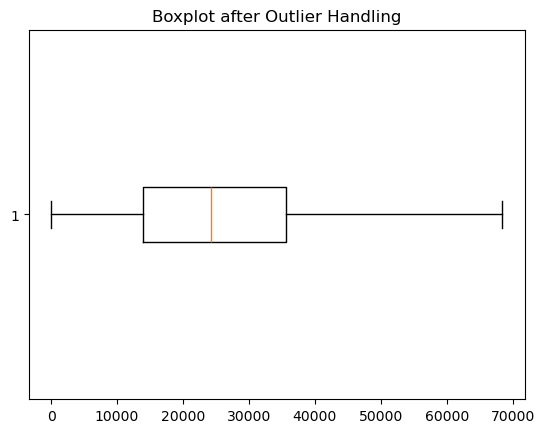

In [94]:
plt.boxplot(df['Purchase_Amount'], vert=False)
plt.title('Boxplot after Outlier Handling')
plt.show()

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8996 entries, 0 to 10198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Customer_ID         8996 non-null   object        
 1   Name                8996 non-null   object        
 2   Gender              8996 non-null   object        
 3   Age                 8996 non-null   int64         
 4   City                8996 non-null   object        
 5   Signup_Date         8996 non-null   datetime64[ns]
 6   Last_Purchase_Date  8996 non-null   datetime64[ns]
 7   Purchase_Amount     8996 non-null   float64       
 8   Feedback_Score      8996 non-null   float64       
 9   Email               8996 non-null   object        
 10  Phone_Number        8996 non-null   object        
 11  Country             8996 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 913.7+ KB


In [96]:
# Save the cleaned DataFrame to CSV
df.to_csv("Cleaned_Customer_Data.csv", index=False)


